<a href="https://colab.research.google.com/github/41275030H/FINAL-PROJECT-/blob/main/Student_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [44]:
url = "https://raw.githubusercontent.com/v123582/edu-dataset/main/student-behavior.csv"
data = pd.read_csv(url)
print("First 5 rows of the dataset:\n", data.head())

First 5 rows of the dataset:
   Certification Course  Gender Department  Height(CM)  Weight(KG)  10th Mark  \
0                   No    Male        BCA       100.0        58.0       79.0   
1                   No  Female        BCA        90.0        40.0       70.0   
2                  Yes    Male        BCA       159.0        78.0       69.5   
3                  Yes  Female        BCA       147.0        20.0       70.0   
4                   No    Male        BCA       170.0        54.0       40.0   

   12th Mark  college mark        hobbies daily studing time  \
0       65.0          80.0    Video Games      0 - 30 minute   
1       80.0          70.0         Cinema     30 - 60 minute   
2       61.0          55.0         Cinema         1 - 2 Hour   
3       59.0          58.0  Reading books         1 - 2 Hour   
4       65.0          30.0    Video Games     30 - 60 minute   

  prefer to study in  salary expectation Do you like your degree?  \
0            Morning               

In [45]:
# Step 3: Inspect and Select Relevant Columns
# We select 'college mark' as the target variable and other academic features as independent variables
target_column = 'college mark'
feature_columns = ['10th Mark', '12th Mark', 'daily studing time', 'Stress Level ', 'Financial Status']

In [46]:
# Remove any rows where the target variable is missing
data = data.dropna(subset=[target_column])
X = data[feature_columns]
y = data[target_column]

In [47]:
# Step 4: Convert Categorical Columns to Numerical
# Use one-hot encoding to convert categorical features to numerical form
X = pd.get_dummies(X, drop_first=True)

In [48]:
# Step 5: Split the Data into Training and Testing Sets
# Here, we split the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (188, 13)
Testing data shape: (47, 13)


In [49]:
# Display first few rows of the training and testing sets
print("\nFirst 5 rows of the Training Set (X_train):\n", X_train.head())
print("\nFirst 5 rows of the Training Set (y_train):\n", y_train.head())
print("\nFirst 5 rows of the Testing Set (X_test):\n", X_test.head())
print("\nFirst 5 rows of the Testing Set (y_test):\n", y_test.head())


First 5 rows of the Training Set (X_train):
      10th Mark  12th Mark  daily studing time_1 - 2 Hour  \
117       85.0       60.0                          False   
155       86.0       68.0                          False   
148       80.2       70.0                          False   
158       50.0       50.0                          False   
232       90.0       75.0                          False   

     daily studing time_2 - 3 hour  daily studing time_3 - 4 hour  \
117                          False                          False   
155                           True                          False   
148                          False                          False   
158                          False                           True   
232                          False                          False   

     daily studing time_30 - 60 minute  daily studing time_More Than 4 hour  \
117                               True                                False   
155                 

In [50]:
# Step 6: Initialize and Train the Model
# Instantiate the Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Step 7: Make Predictions on the Testing Set
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

In [39]:
# Step 7: Make Predictions on the Training and Testing Sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [40]:
# Step 8: Evaluate Model Performance
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [51]:
print("\nModel Evaluation Results:")
print("Training Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"R-squared Score: {r2_train}")

print("\nTesting Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R-squared Score: {r2_test}")



Model Evaluation Results:
Training Set Evaluation:
Mean Squared Error (MSE): 158.31177524806478
Mean Absolute Error (MAE): 8.532207632861155
R-squared Score: 0.3004467798244509

Testing Set Evaluation:
Mean Squared Error (MSE): 249.79034129227318
Mean Absolute Error (MAE): 9.34883859351875
R-squared Score: 0.22615801882392095


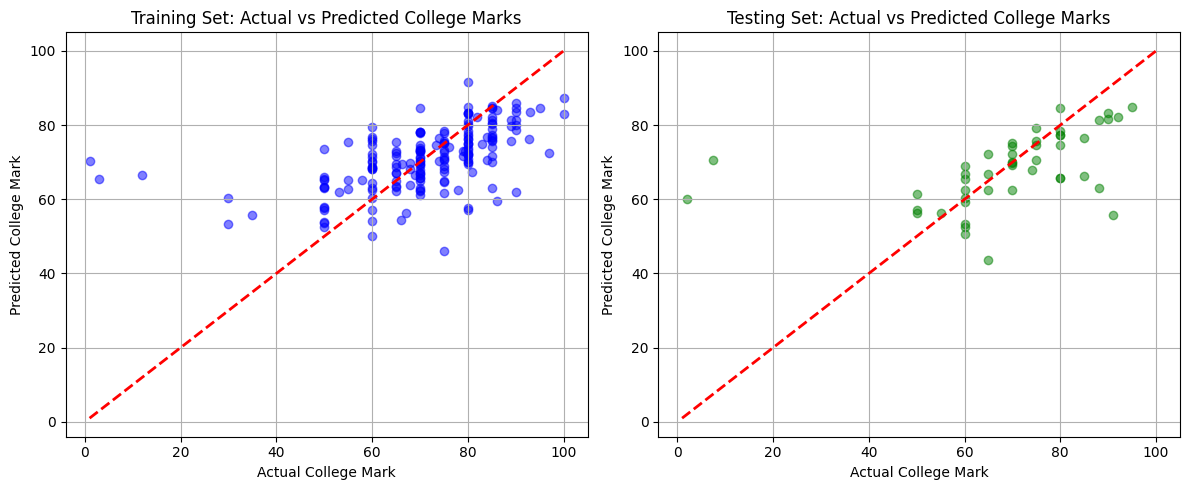

In [42]:
# Step 9: Visualize the Predictions vs Actual Values using Scatter Plot for Training Set
plt.figure(figsize=(12, 5))

# Scatter plot for Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.title("Training Set: Actual vs Predicted College Marks")
plt.xlabel("Actual College Mark")
plt.ylabel("Predicted College Mark")
plt.grid(True)
plt.xlim([y.min()-5, y.max()+5])  # Set x-axis limits
plt.ylim([y.min()-5, y.max()+5])  # Set y-axis limits

# Scatter plot for Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.title("Testing Set: Actual vs Predicted College Marks")
plt.xlabel("Actual College Mark")
plt.ylabel("Predicted College Mark")
plt.grid(True)
plt.xlim([y.min()-5, y.max()+5])  # Set x-axis limits
plt.ylim([y.min()-5, y.max()+5])  # Set y-axis limits

plt.tight_layout()
plt.show()

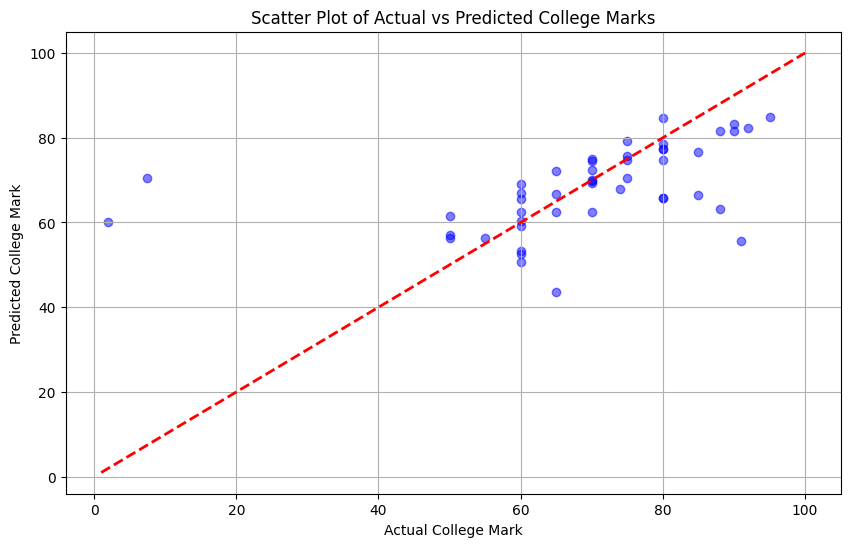

In [36]:
# Step 9: Visualize the Predictions vs Actual Values using Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.title("Scatter Plot of Actual vs Predicted College Marks")
plt.xlabel("Actual College Mark")
plt.ylabel("Predicted College Mark")
plt.grid(True)  # Adding a grid for better readability
plt.xlim([y.min()-5, y.max()+5])  # Set x-axis limits
plt.ylim([y.min()-5, y.max()+5])  # Set y-axis limits
plt.show()